# 2021-03-10 • Conditional pdf

In [1]:
from tfiers.nb import *

Preloading: numpy, matplotlib.pyplot, pandas, seaborn.
Imported `np`, `mpl`, `plt`, `sns`, `pd`


In [16]:
x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 5, 502)  # broadcasting error catching
xg, yg = np.meshgrid(x, y, indexing='ij')
xy = np.dstack([xg, yg])

def plot(z, title):
    ''' plot a function on xy grid '''
    fig = plt.figure()
    nrows = 1
    ncols = 2
    ax_2d = fig.add_subplot(nrows, ncols, 1)
    ax_2d.contourf(xg, yg, z)
    ax_2d.set_aspect('equal')
    ax_3d = fig.add_subplot(nrows, ncols, 2, projection='3d')
    ax_3d.plot_surface(xg, yg, z, cmap='viridis', antialiased=False)
    ax_3d.set_title(f"${title}$")

In [3]:
def analyse(p_xy):
    dx = np.diff(x)[0]
    dy = np.diff(y)[0]
    p_x = p_xy.sum(axis=1) * dx
    p_y = p_xy.sum(axis=0) * dy
    #  integrate joint to get marginals
    #  (we assume evenly spaced grid, hence differential outside sum).
    
    # conditionals
    p_x_given_y = p_xy / p_y
    p_y_given_x = p_xy / p_x[:,np.newaxis]
    
    plot(p_xy, "p(x,y)")
    plot(p_x_given_y, "p(x|y)")
    plot(p_y_given_x, "p(y|x)")
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, **figsize(aspect=3))
    ax1.plot(x, p_x)
    ax1.set_title("$p(x)$")
    ax2.plot(y, p_y)
    ax2.set_title("$p(y)$")

In [4]:
from scipy.stats import multivariate_normal

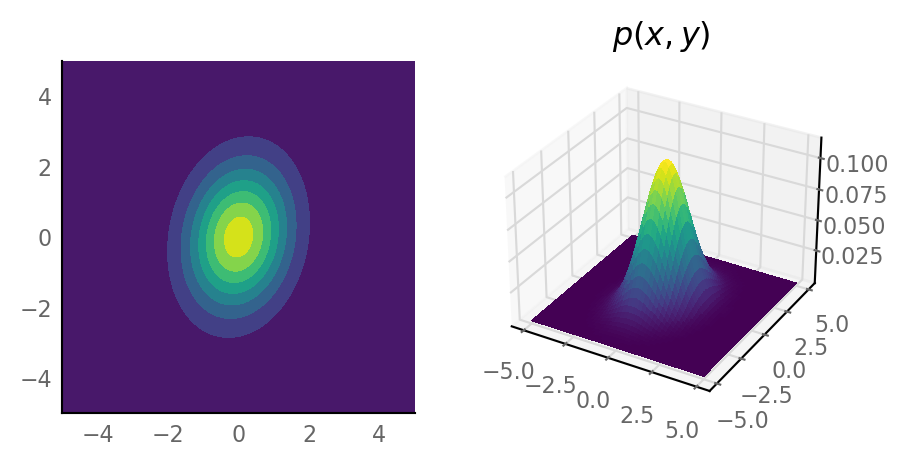

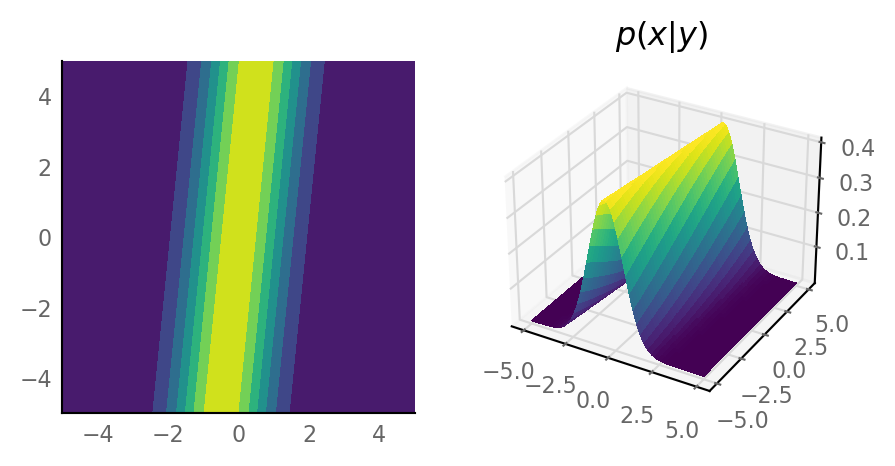

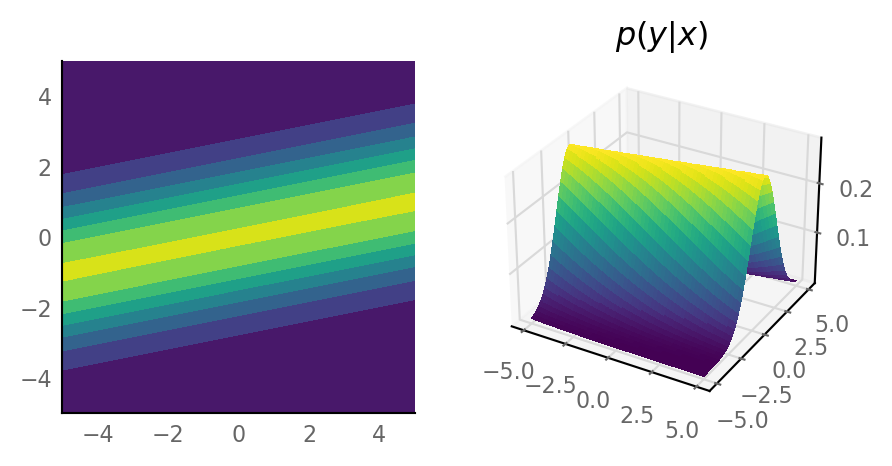

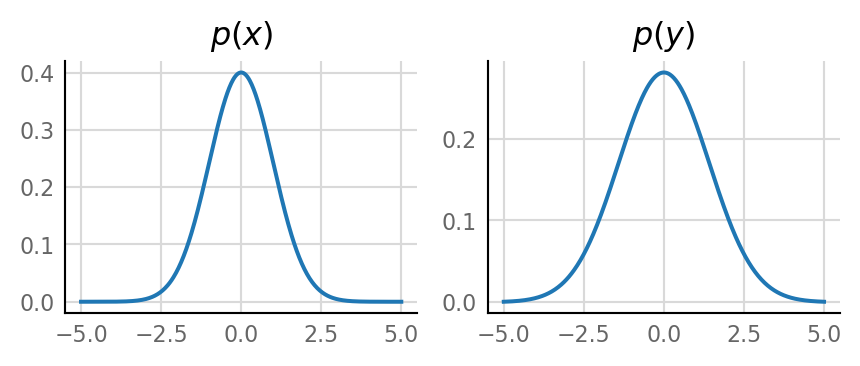

In [5]:
Σ = [[1  , 0.2],
     [0.2, 2  ]]
g = multivariate_normal.pdf(xy, cov=Σ)
analyse(g)

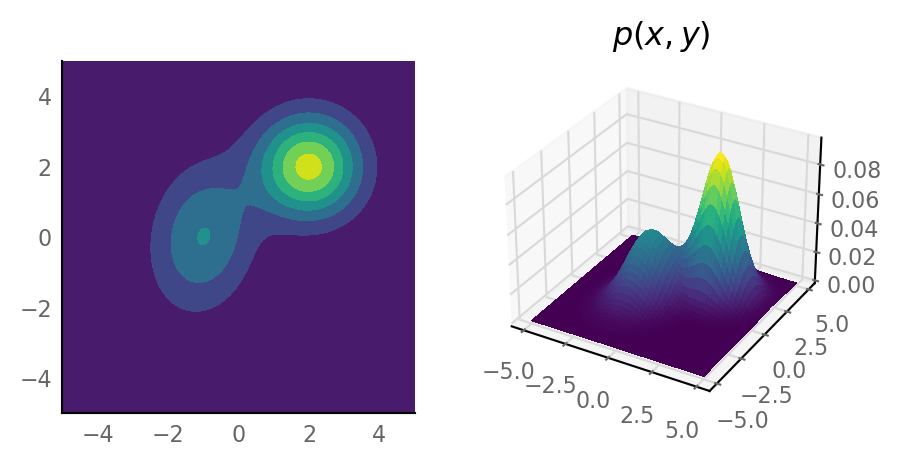

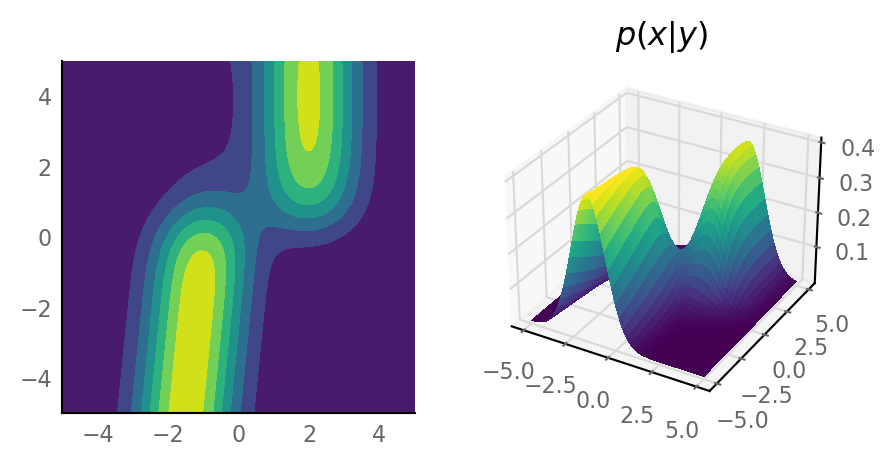

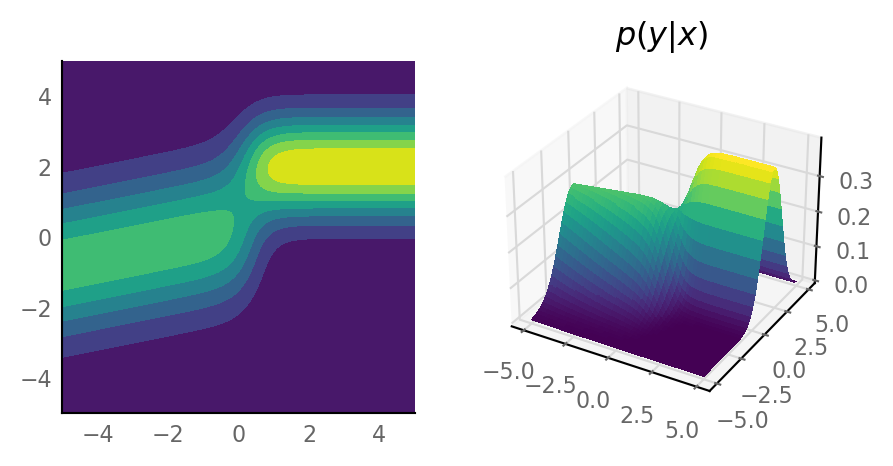

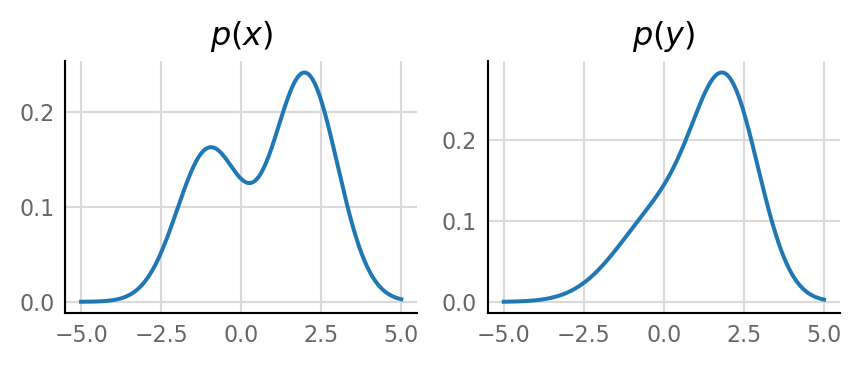

In [6]:
mog = (0.4 * multivariate_normal.pdf(xy, mean=[-1,0], cov=Σ)
       + 0.6 * multivariate_normal.pdf(xy, mean=[2,2])) # default Σ = I

analyse(mog)